# 차원의 저주
3차원 큐브에서 임의의 두 점을 선택했을 때 평균 거리는 대략 0.66정도라고 함.  
1,000,000차원 초입방체에서 두 점을 임의로 선택했을 때 평균 거리는 대략 428.25라고 함.  
이처럼 **차원이 높아질 수록 데이터 사이의 거리가 멀어짐.**  
>이는 학습 샘플과 새로운 샘플의 거리도 매우 멀리 떨어져 있을 가능성이 높다는 것.  
즉 차원이 높아질 수록 **과대적합**의 위험이 있음.

해결책으로는  
- 학습 데이터셋의 밀도가 충분히 높아질 때까지 학습 데이터셋의 크기(샘플수)를 키우는 것. 그러나 차원이 높아질수록 필요한 샘플수는 기하급수적으로 커져서 어려움.  
- **투영(projection)** 과 **매니폴드 학습** 

---
## 투영
대부분의 문제에서 학습 샘플은 모든 차원에 걸쳐 균일하게 퍼져 있지 않음.  
많은 특성이 거의 변화가 없는 반면, 몇몇 특성들은 서로 강하게 연관되어 있는 경우가 많음.  
> 모든 학습 샘플이 고차원 공간안의 저차원 **부분 공간** 에 놓여 있음.  
학습 샘플을 그 부분 공간에 수직으로 투영하면 차원을 축소할 수 있음.

---
## 매니폴드 학습
그러나 투영은 언제나 최선의 방법이 아님. 많은 경우 부분공간이 평명이 아니라 뒤틀리거나 휘어 있기도 함.  
**스위스 롤** 데이터셋을 보면 이해가 갈 듯

In [2]:
from sklearn.datasets import make_swiss_roll
x, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

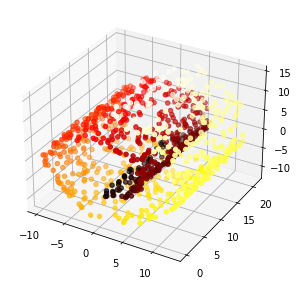

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t, cmap=plt.cm.hot)
plt.show()

스위스롤은 2D 매니폴드의 한 예임. 즉 고차원 공간에서 휘어지거나 뒤틀린 2D 모양임.  
많은 차원 축소 알고리즘이 **학습 샘플이 놓여진 매니폴드를 모델링**하는 식으로 작동함.  
이는 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 **매니폴드 가정(또는 가설)** 에 근거함.  
또한 처리해야 할 작업이 저차원의 매니폴드 공간에 표현되면 더 간단해질 것이란 가정도 병행됨.  
그런데 이 가정은 항상 유효하진 않음. 예를 들어 고차원에서는 간단하게 만들 수 있는 결정 경계가 매니폴드에선 더 복잡할 수도 있음.  
> 요약하자면 학습 샘플의 차원을 감소시킬 경우 **훈련 속도는 빨라지지만**  
**항상 더 낫거나 간단한 솔루션이 되는 것은 아님** 이는 전적으로 데이터셋에 달림.